In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the content and style images
def load_and_process_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.expand_dims(img, axis=0)
    return img

In [ ]:
# Function to display images
def display_image(image, title=None):
    image = np.squeeze(image)  # Remove batch dimension
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Import the necessary module
from google.colab import files

# Upload the zip file file B
uploaded = files.upload()

Saving style.jpeg to style.jpeg
Saving img.jpeg to img.jpeg


In [ ]:
# Load images
content_path = 'img.jpeg'  # Update with your content image path
style_path = 'style.jpeg'      # Update with your style image path
content_image = load_and_process_image(content_path)
style_image = load_and_process_image(style_path)

In [ ]:
# Load VGG19 model and extract features
def load_vgg_model():
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
    return vgg

vgg_model = load_vgg_model()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Define content and style layers
content_layers = ['block5_conv2']  # Content layer
style_layers = [
    'block1_conv1',
    'block2_conv1',
    'block3_conv1',
    'block4_conv1',
    'block5_conv1'
]  # Style layers

In [ ]:
# Extract features
def get_model():
    style_outputs = [vgg_model.get_layer(name).output for name in style_layers]
    content_outputs = [vgg_model.get_layer(name).output for name in content_layers]
    model_outputs = style_outputs + content_outputs
    return tf.keras.Model(vgg_model.input, model_outputs)

In [ ]:
model = get_model()

In [ ]:
# Define the loss functions
def compute_loss(style_outputs, content_outputs, style_weight=1e-2, content_weight=1e4):
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[i] - style_outputs[i])**2) for i in range(len(style_outputs))])
    style_loss *= style_weight / len(style_outputs)

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[i] - content_outputs[i])**2) for i in range(len(content_outputs))])
    content_loss *= content_weight / len(content_outputs)

    total_loss = style_loss + content_loss
    return total_loss

In [ ]:
# Optimize the image
def run_style_transfer(content_image, style_image, num_iterations=1000):
    # Initialize generated image with the content image
    generated_image = tf.Variable(content_image, dtype=tf.float32)

    # Set optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

    for i in range(num_iterations):
        with tf.GradientTape() as tape:
            outputs = model(generated_image)
            style_outputs = outputs[:len(style_layers)]
            content_outputs = outputs[len(style_layers):]
            loss = compute_loss(style_outputs, content_outputs)

        # Compute gradients and update the generated image
        grads = tape.gradient(loss, generated_image)
        optimizer.apply_gradients([(grads, generated_image)])

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss.numpy()}")
            display_image(generated_image.numpy(), title=f"Iteration {i}")

    return generated_image

In [ ]:
import tensorflow as tf

def resize_image(image, max_dim=512):
  """Resizes the image to a maximum dimension while maintaining aspect ratio."""
  shape = tf.cast(tf.shape(image)[1:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim
  new_shape = tf.cast(shape * scale, tf.int32)
  image = tf.image.resize(image, new_shape)
  return image

# Resize images before processing
content_image = resize_image(content_image)
style_image = resize_image(style_image)

Iteration 0, Loss: 0.0


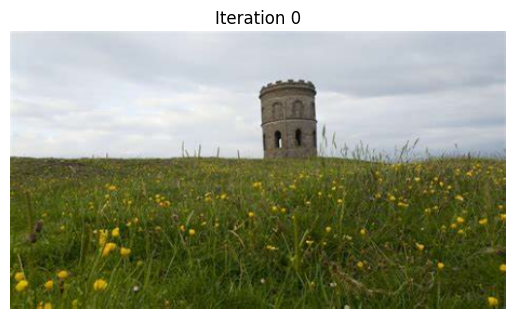

Iteration 100, Loss: 0.0


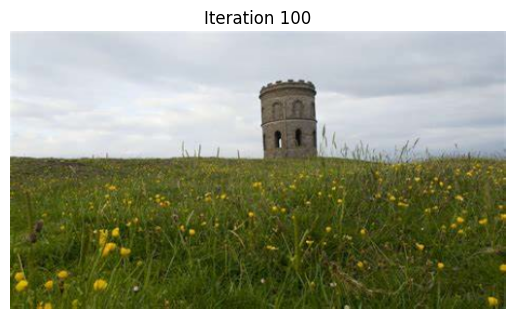

Iteration 200, Loss: 0.0


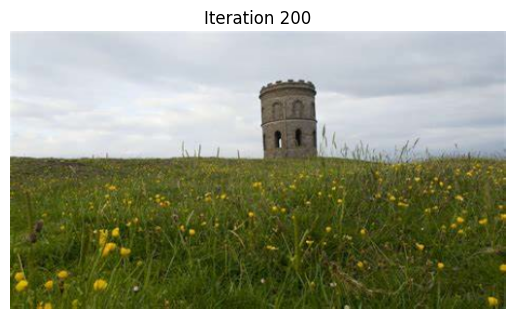

Iteration 300, Loss: 0.0


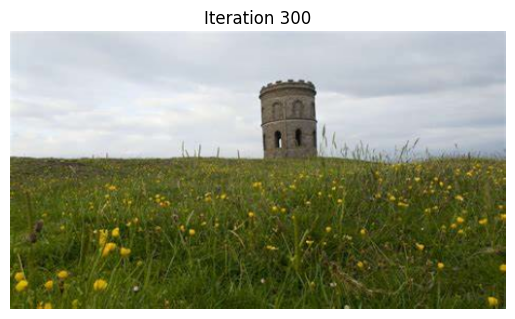

Iteration 400, Loss: 0.0


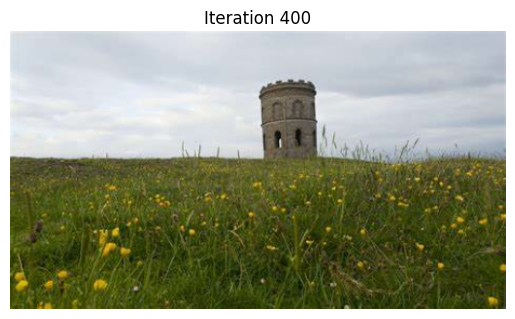

Iteration 500, Loss: 0.0


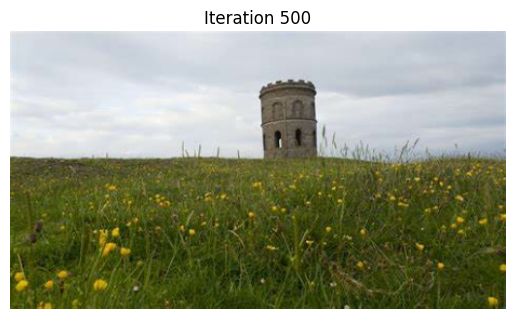

Iteration 600, Loss: 0.0


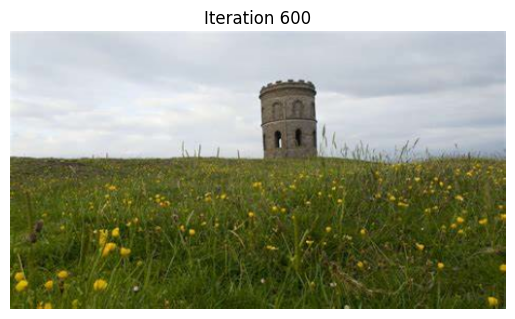

Iteration 700, Loss: 0.0


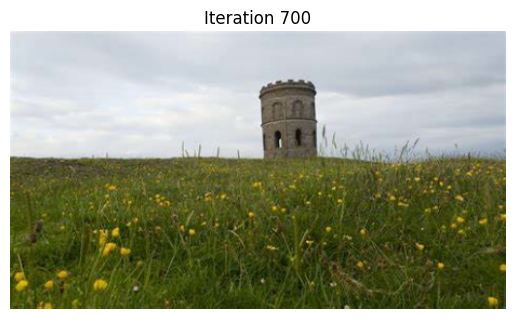

Iteration 800, Loss: 0.0


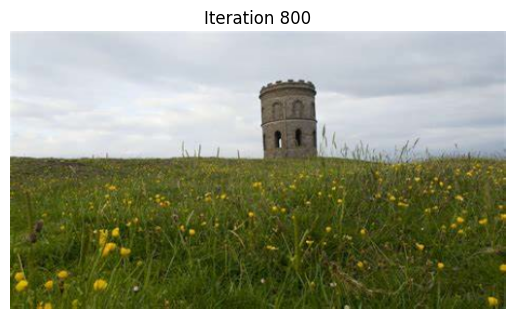

Iteration 900, Loss: 0.0


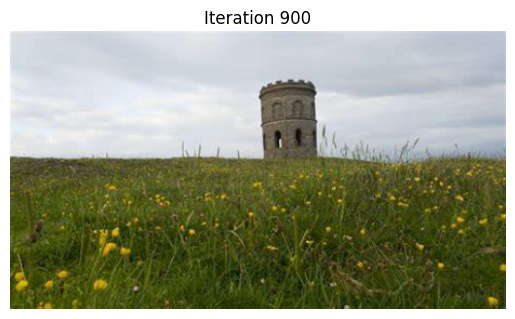

In [ ]:
# Run the style transfer
final_image = run_style_transfer(content_image, style_image) # Reduce iterations